<center>
<h1> <b> Problem statement </b> <h1>
<h2> <center>  What relationship are there between PGE electrical usage  and solar power accumulation 
in CA in 2012 - 2016?  </h2>
</center>

Context: In CA, California Public Utilities Commision (CPUC) regulates California’s three large investor owned electric utilities – Pacific Gas and Electric (PG&E), Southern California Edison (SCE), and San Diego Gas and Electric (SDG&E). This study focuses on just PGE, so it is therefore incomplete.
<br>
As we see some of the numbers below, PG&E only covers a portions of the state's area.
<br>
This means that only 818/2667 = 0.3067 ZIP codes have solar power in CA! The PGE number depends on the sampling rate. Since ZIP codes are propotional to population, PG&E covers only about 30% of CA.
<br>
I have not found yet another study of PG&E electical usage vs solar power generation, so I cannot compare these results with any prior work.


<center>
<h2> 1. Load in Q1 - Q2 for 2012 -  2016 electric data from PG&E  </h2>
</center>

In [3]:
pge_q1.head()

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh
0,93101,1,2016,Elec- Commercial,Y,0,0,NaN
1,93101,1,2016,Elec- Residential,Y,0,0,NaN
2,93105,1,2016,Elec- Commercial,Y,0,0,NaN
3,93105,1,2016,Elec- Residential,Y,0,0,NaN
4,93110,1,2016,Elec- Commercial,Y,0,0,NaN


<h2> 2. Let's do some data cleanup & EDA </h2>

In [7]:
pge_q.shape

(68587, 8)

<h3> For analysis on the Mac Book Pro I wil use only a fraction of the full data. I will use the full data set
when I run this on an AWS host.  </h3>

In [19]:
pge_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3429 entries, 7419 to 5781
Data columns (total 8 columns):
ZipCode           3429 non-null int64
Month             3429 non-null int64
Year              3429 non-null int64
CustomerClass     3429 non-null int64
Combined          3429 non-null int64
TotalCustomers    3429 non-null object
TotalkWh          3429 non-null object
AveragekWh        3429 non-null object
dtypes: int64(5), object(3)
memory usage: 241.1+ KB


Full data set is:   
<pre>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68587 entries, 0 to 7407
Data columns (total 8 columns):
ZipCode           68587 non-null int64
Month             68587 non-null int64
Year              68587 non-null int64
CustomerClass     68587 non-null object
Combined          68587 non-null int64
TotalCustomers    68587 non-null object
TotalkWh          68587 non-null object
AveragekWh        68587 non-null object
dtypes: int64(4), object(4)
memory usage: 4.7+ MB
</pre>

<h2> 2.1 Data connecting ZIP codes to climage zones. </h2>

We will get data which connects ZIP codes to climate zones. PG&E uses ZIP codes to
organize its data; solar power data uses climate zones. To connects these 2 sets of data, will use this data set here.

In [34]:
zip_to_zones_df.tail(3)

,ZIP Code,Building Climate Zone,Unnamed: 2,Unnamed: 3,Unnamed: 4
1721,96161.0,16.0,NaN,NaN,NaN
1722,96162.0,16.0,NaN,NaN,NaN
1723,NaN,NaN,NaN,NaN,NaN


Dictonary connecting ZIP codes to climate zones.

<h2> 2.2 Temperatures in climate zones  in CA. </h2>

In [46]:
ca_2015_zone_temp_df_num.head(3)

,Zone,Jan_Ave_Temp,Feb_Ave_Temp,Mar_Ave_Temp,Apr_Ave_Temp,May_Ave_Temp,Jun_Ave_Temp,Jul_Ave_Temp,Aug_Ave_Temp,Sep_Ave_Temp,Oct_Ave_Temp,Nov_Ave_Temp,Dec_Ave_Temp
0,1,48,49,49,50,52,65,66,67,67,55.1,52,49.7
1,2,48,51,52,55,60,65,68,68,68,65.1,55,49.7
2,3,48,52,54,55,59,62,63,64,65,60.1,55,49.9


<h2> 2.3 Let's get now some solar install data. </h2>

In [49]:
ca_solar_df = pd.concat([ca_solar_df1, ca_solar_df2, ca_solar_df3])

In [50]:
ca_solar_df.shape

(90918, 123)

For analysis on the Mac Book Pro I wil use only a fraction of the full data. I will use the full data set
when I run this on an AWS host. 

In [53]:
ca_solar_df.head(3)

,Application Number,Program Administrator,Program,Incentive Design,Incentive Type,Incentive Step,Incentive Amount,Total Cost,Nameplate Rating,CEC PTC Rating,...,CEC PTC Rating Single-Axis Tracking,CEC PTC Rating Dual-Axis Tracking,CSI Rating Fixed,CSI Rating Single-Axis Tracking,CSI Rating Dual-Axis Tracking,MASH Track 1A Incentive Amount,MASH Track 1B Incentive Amount,MASH Track 2 Incentive Amount,MASH Track 1A % Capacity,MASH Track 1B % Capacity
58071,PGE-CSI-45079,PG&E,Small Commercial (< 10 kW) and All Residential,$0.25 per Watt EPBB,EPBB,Step 9a,700.0,17250.0,3.29,2.851,...,0.0,0.0,2.802,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15808,PGE-CSI-65715,PG&E,Small Commercial (< 10 kW) and All Residential,$0.20 per Watt EPBB,EPBB,Step 10,1169.0,51888.0,7.52,6.522,...,0.0,0.0,5.846,0.0,0.0,NaN,NaN,NaN,NaN,NaN
11308,PGE-CSI-56954,PG&E,Small Commercial (< 10 kW) and All Residential,$0.20 per Watt EPBB,EPBB,Step 10,669.0,17312.0,3.90,3.344,...,0.0,0.0,3.343,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [54]:
ca_solar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 58071 to 26381
Columns: 123 entries, Application Number to MASH Track 1B % Capacity
dtypes: float64(56), int64(1), object(66)
memory usage: 4.3+ MB


Full data set is : 
<pre>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90918 entries, 0 to 24760
Columns: 123 entries, Application Number to MASH Track 1B % Capacity
dtypes: float64(56), int64(1), object(66)
memory usage: 86.0+ MB
</pre>

Total numbers ZIP codes PG&E data 890.

Total ZIP codes in CA is 2667

So this means that only 818/2667  = 0.3067 ZIP codes have solar power in CA!

Let's look at Solar data and kWh generated. These are the columns with kWh data.

We compute temp ave. by zones for 1-6 months. 

Add avg_temp to the PGE df

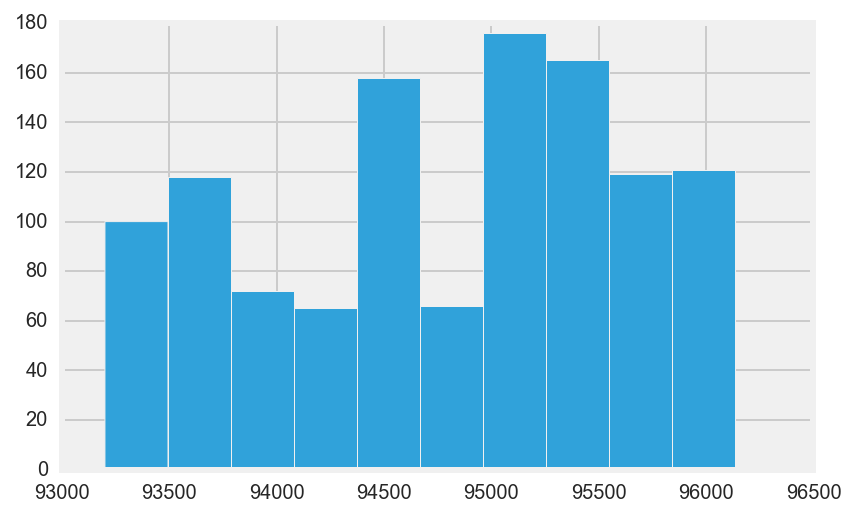

In [79]:
pge_q_num.ZipCode.hist()

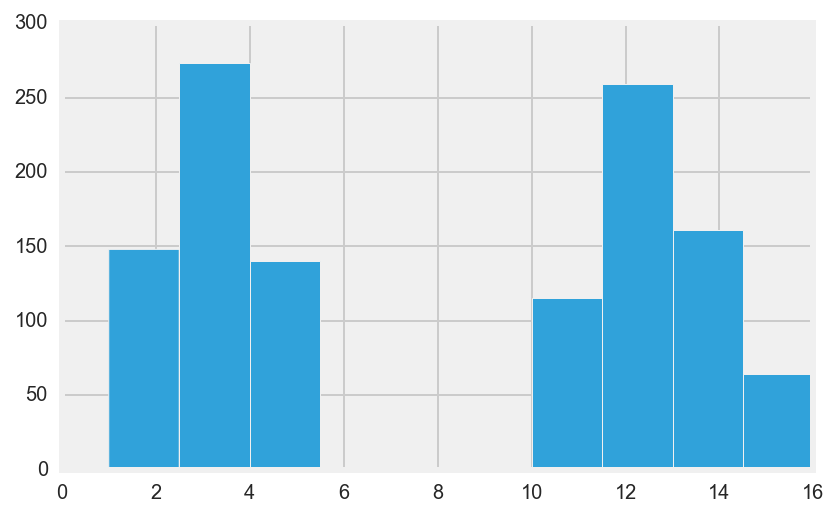

In [80]:
pge_q_num.zone.hist()

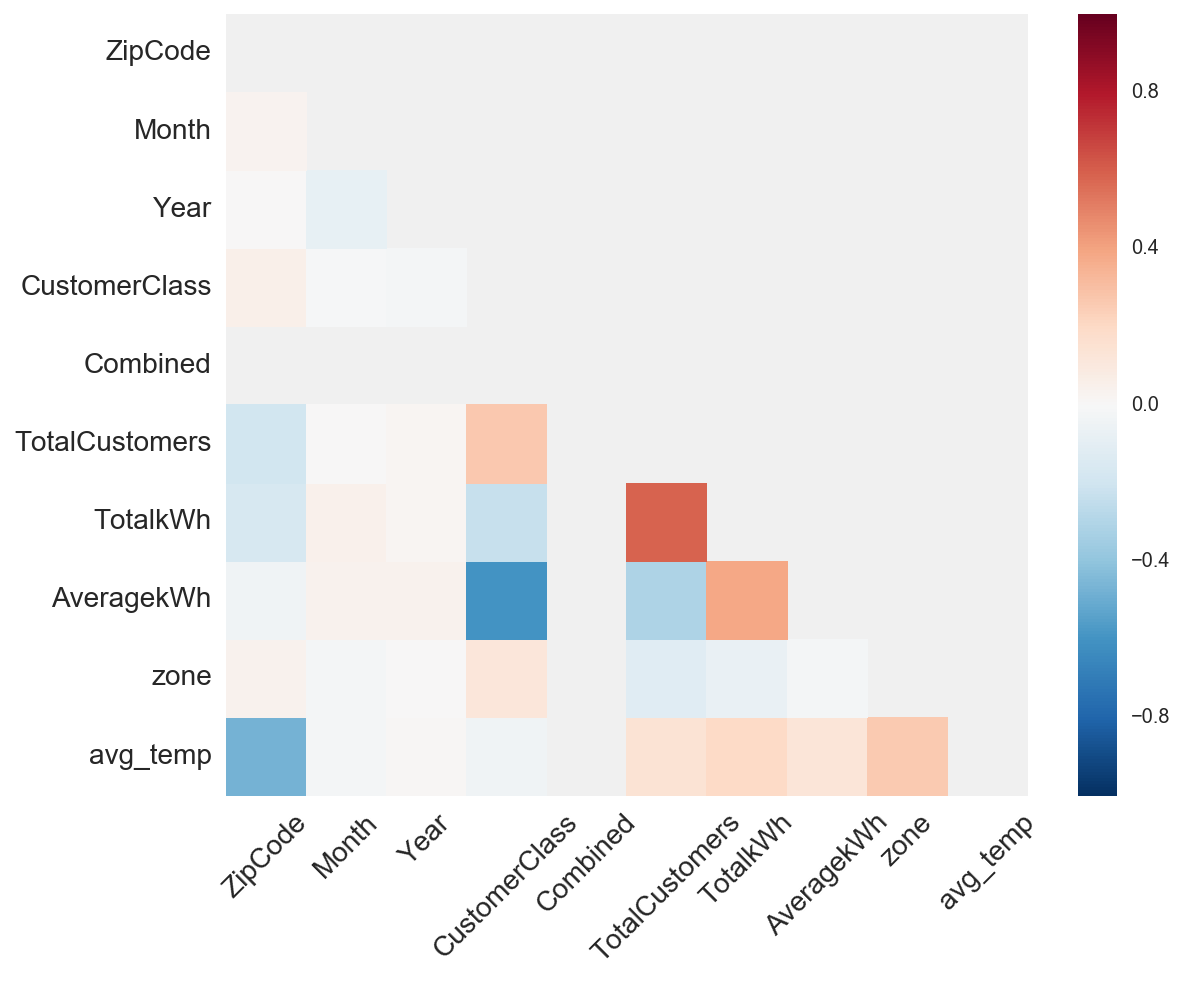

In [82]:
mask = np.zeros_like(pge_q_num_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(pge_q_num_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

Looking just at PG&E consumption data, we see that there is strong anti-correlation
between "TotalKWh" and "Month", and anti-corellation with "CustomerClass".

So interesting vars are TotalCustomers, TotalkWh, Month, zone, AveragekWh

![](2.3.14.png)

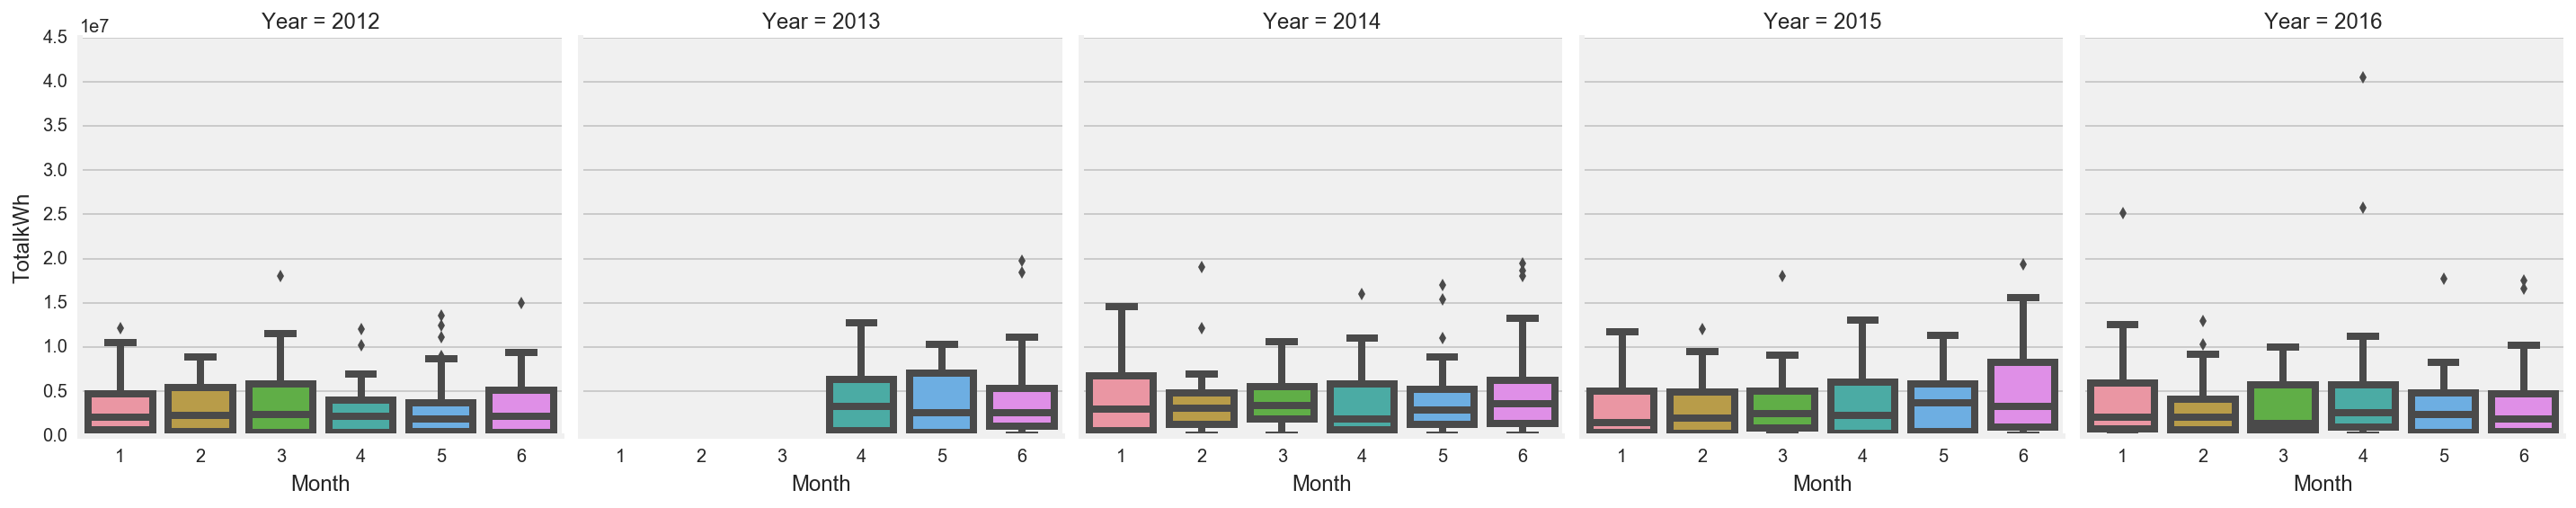

In [83]:
sns.factorplot(x='Month', y='TotalkWh',col='Year', kind='box', data=pge_q_num)

And here are the plots w the full data: 

![](2.3.4.png)

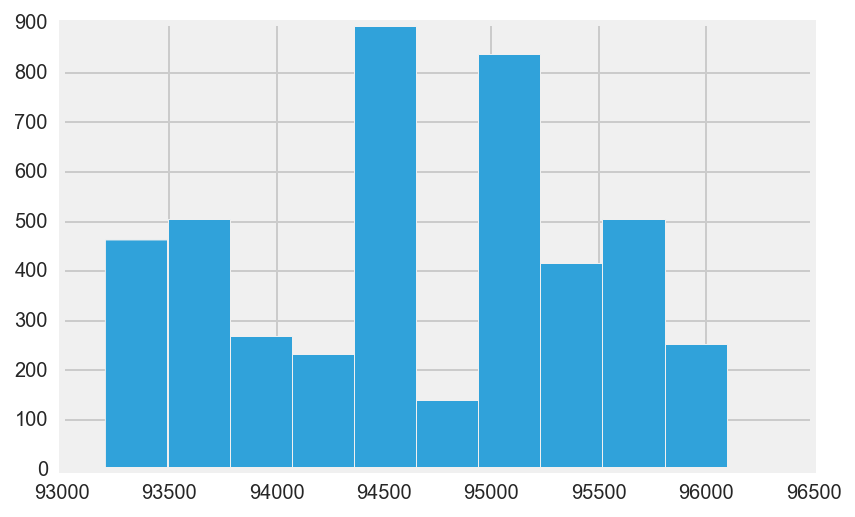

In [86]:
ca_solar_df_num.ZIP.hist()

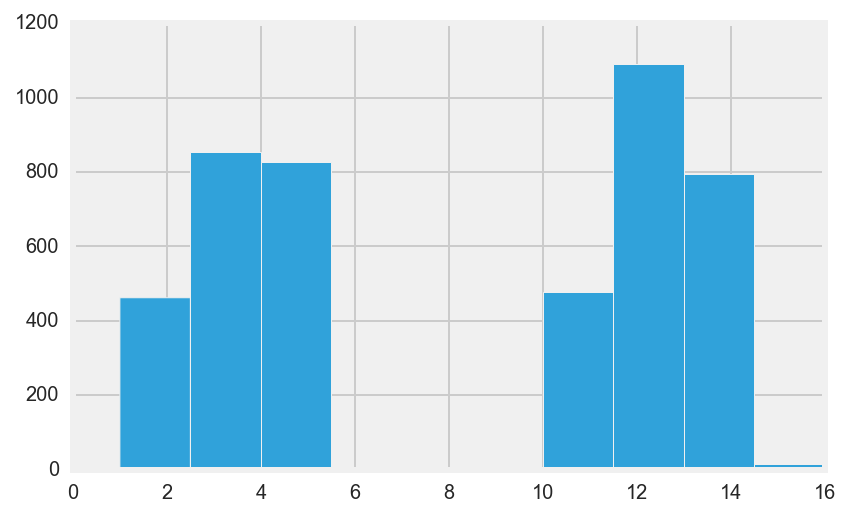

In [87]:
ca_solar_df_num.zone.hist()

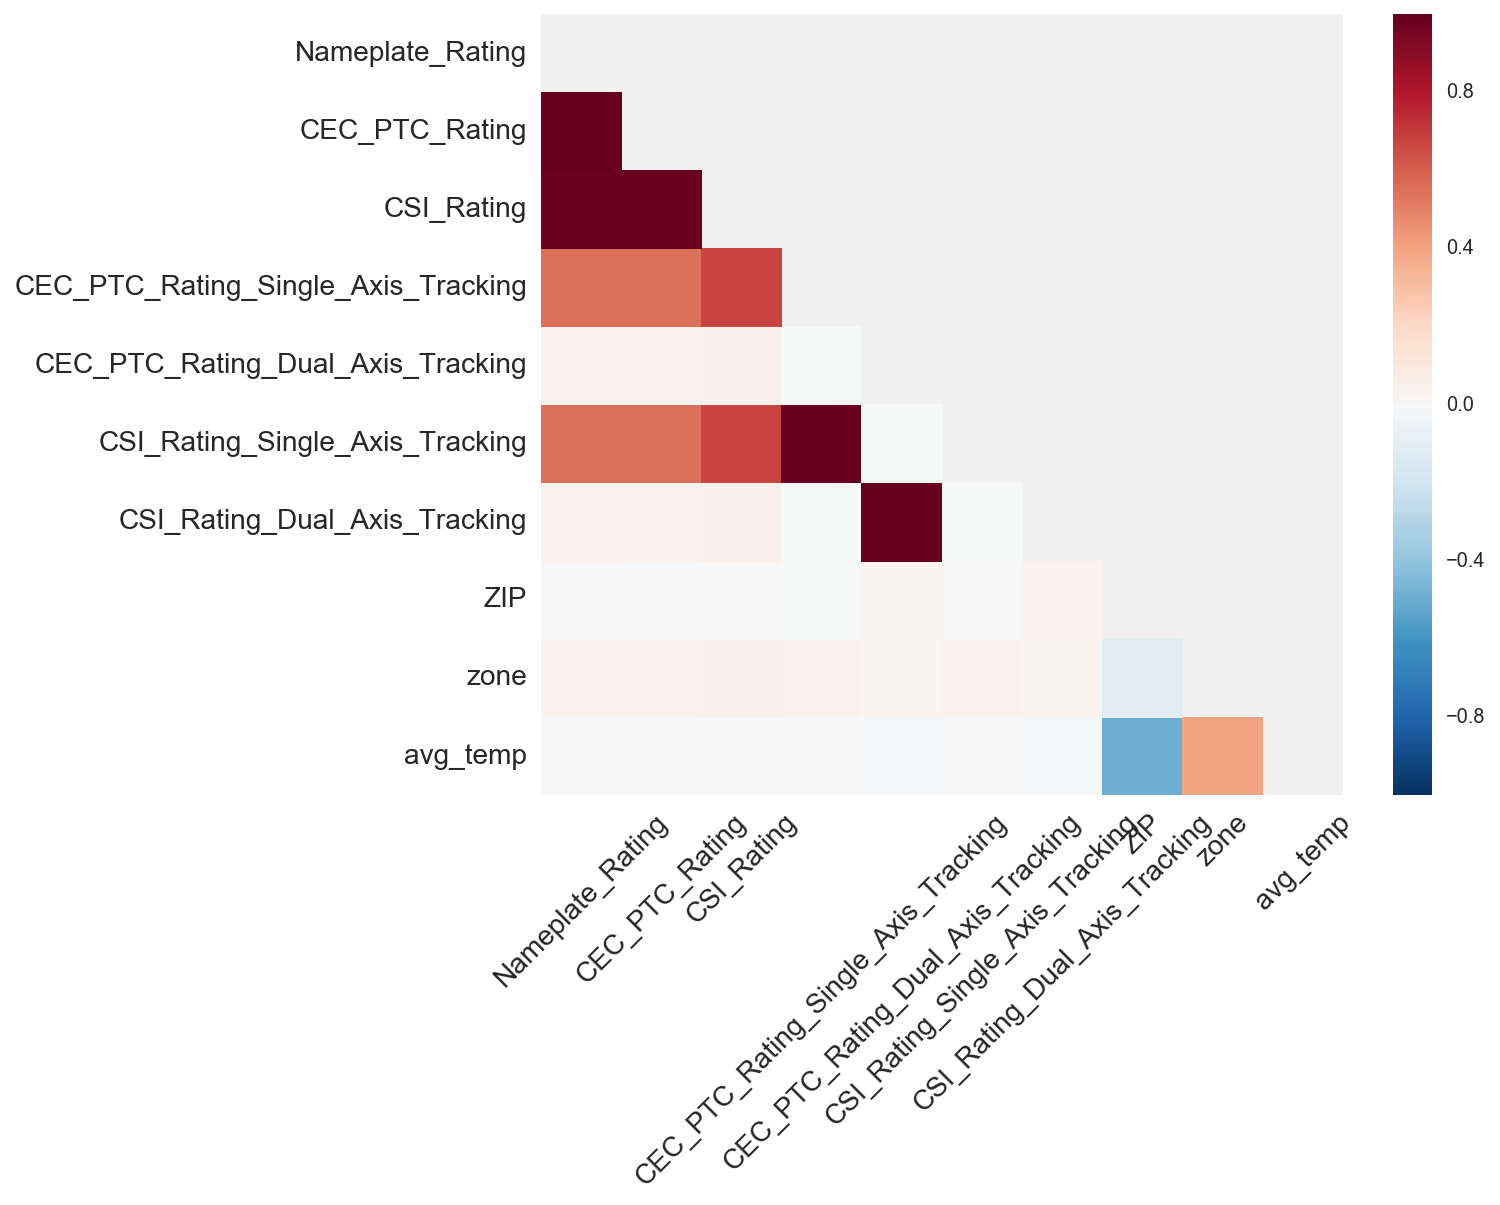

In [89]:
mask = np.zeros_like(ca_solar_df_num_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(ca_solar_df_num_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

So interesting vars are Nameplate Rating, CEC PTC Rating, CSI Rating, zone, avg_temp

![](2.3.15.png)

<h2> 3. Let's do now some analysis. 
<br>
<br>
3.1 First, we do some linear regression. </h2>

I want to do linear regression, since that keeps the depedent variables clear. This helps in 
interpret the final results.

In [94]:
pge_q_num.head(3)

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh,zone,avg_temp
7419,95917,3,2015,2,1,505.0,328052.0,650.0,11.0,53.500000
1393,95204,4,2012,1,1,581.0,2218140.0,3818.0,12.0,57.166667
3426,94530,2,2016,1,1,531.0,2439342.0,4594.0,3.0,55.000000


Linear Regression did not give believable results. I changed the regression formula to contain more categorical vars 
and ran Ridge regression with cross-validation.

<h2> 3.2 Then Ridge with cross-validation </h2>

I got this following: 
<pre>
[ 0.7356081   0.73186481  0.74546983  0.76592919  0.73462015  0.73472417
  0.74573241  0.72706402  0.73825445  0.74745145]
0.740671856871
</pre>

<h2> 3.3 Let's look at ElasticNet to get the correlations between the vars present.  </h2>

Elastic Net is well-suited for analyzing data with internal correlations, like the present data.

The enet score is:  0.565660249521. Not great, but not too bad. 

![](3.4.1.0.png)

And here is the result with all the data on AWS: 

![](3.4.1.2.png)

Looking just at PG&E sampled consumption data, we see that 'TotalkWh' correlates with "zone", "avg_temp", "Month"  and anti-correlation with "CustomerClass".

The full data analysis shows Totalkwh correlation with CustomerClass[3], Month, zone and ave_temp, and anti-correlation with CustomerClass[2], CustomerClass[3]. 

Let me do a time series analysis, see if we get as good are result there.
The data is monthly, Jan - Jun for 5 years, 2012-2016, so it might be ameanable to time series analysis. 

<h2> 3.3 Time series analysis. </h2>

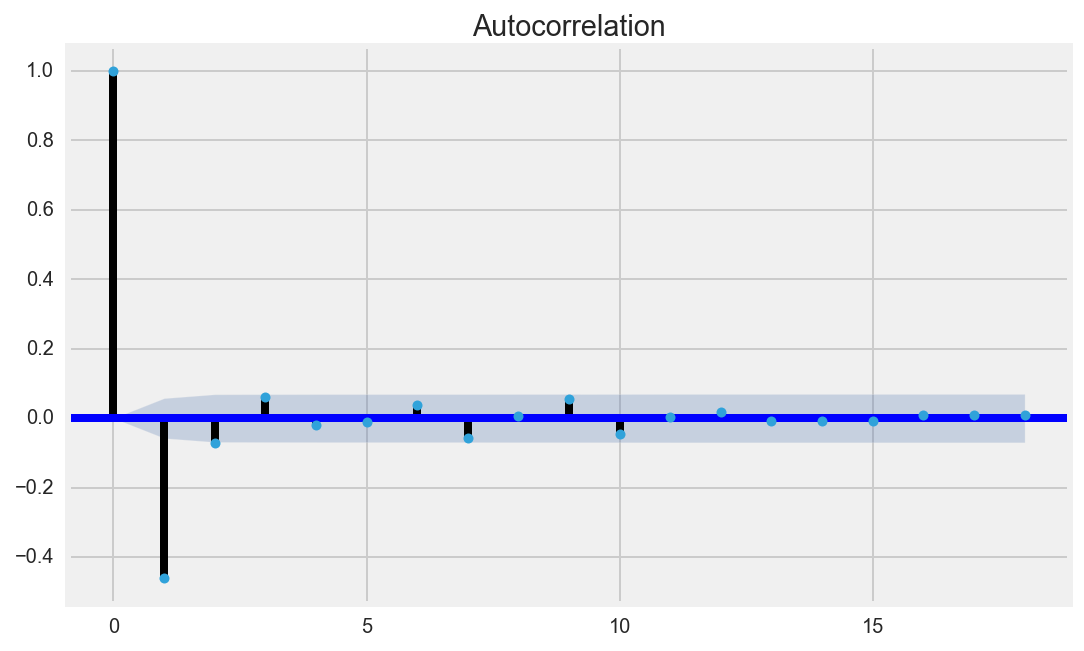

In [114]:
# pick the lag value at 18 = 6 * 3 the total number of data points we have for each avg kwh, total kwh
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
plot_acf(avgkwh_diff, lags=18, ax=ax)
plt.show()

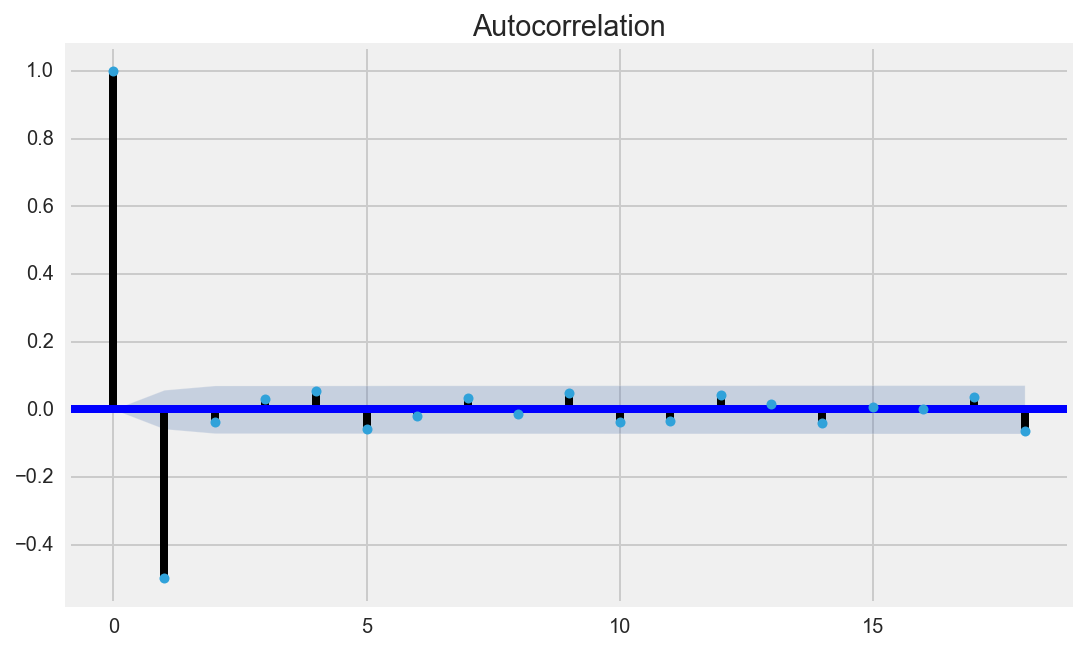

In [115]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
plot_acf(totalkwh_diff, lags=18, ax=ax)
plt.show()

In [116]:
ar1 = ARMA(avgkwh_diff.values, (1,0)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1159
Model:                     ARMA(1, 0)   Log Likelihood              -11201.062
Method:                       css-mle   S.D. of innovations           3809.974
Date:                Thu, 06 Oct 2016   AIC                          22408.124
Time:                        11:34:09   BIC                          22423.290
Sample:                             0   HQIC                         22413.846
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2450     76.619     -0.003      0.997      -150.416   149.926
ar.L1.y       -0.4610      0.026    -17.698      0.000        -0.512    -0.410
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1690           +0.0000j            2.1690            0.5000
-----------------------------------------------------------------------------
"""

In [117]:
ar2 = ARMA(totalkwh_diff.values, (1,0)).fit()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1159
Model:                     ARMA(1, 0)   Log Likelihood              -19466.360
Method:                       css-mle   S.D. of innovations        4764777.933
Date:                Thu, 06 Oct 2016   AIC                          38938.719
Time:                        11:34:09   BIC                          38953.885
Sample:                             0   HQIC                         38944.442
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2319.9603   9.34e+04      0.025      0.980     -1.81e+05  1.85e+05
ar.L1.y       -0.4992      0.025    -19.622      0.000        -0.549    -0.449
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0033           +0.0000j            2.0033            0.5000
-----------------------------------------------------------------------------
"""

In [118]:
r2_score(avgkwh_diff, ar1.fittedvalues)

0.21271932491158407

On AWS, I get: 0.46362425034127097. This is a pretty good score. 

In [119]:
r2_score(totalkwh_diff, ar2.fittedvalues)

0.24939477348565819

On AWS, I get: 0.21200243459953971. Not clear  why the score went down w more data.

These results are not as high as the linear regression, but are probably more realistic.

In [ ]:
plot_acf(ar1.resid, lags=100)

In [ ]:
plot_acf(ar2.resid, lags=100)

These plots show values close to 0 onthe y-axis, so they are trust-worthy. 

The auto-correlation plots look Ok also. No hidden auto-correlations.

<h2> 4. Let's turn now to the solar data analysis. </h2>

In [123]:
ca_solar_df_num.head(3)

,Nameplate_Rating,CEC_PTC_Rating,CSI_Rating,CEC_PTC_Rating_Single_Axis_Tracking,CEC_PTC_Rating_Dual_Axis_Tracking,CSI_Rating_Single_Axis_Tracking,CSI_Rating_Dual_Axis_Tracking,ZIP,zone,avg_temp
58071,3.29,2.851,2.802,0.0,0.0,0.0,0.0,95962,11.0,53.500000
15808,7.52,6.522,5.846,0.0,0.0,0.0,0.0,94509,12.0,57.166667
11308,3.90,3.344,3.343,0.0,0.0,0.0,0.0,93932,4.0,57.500000


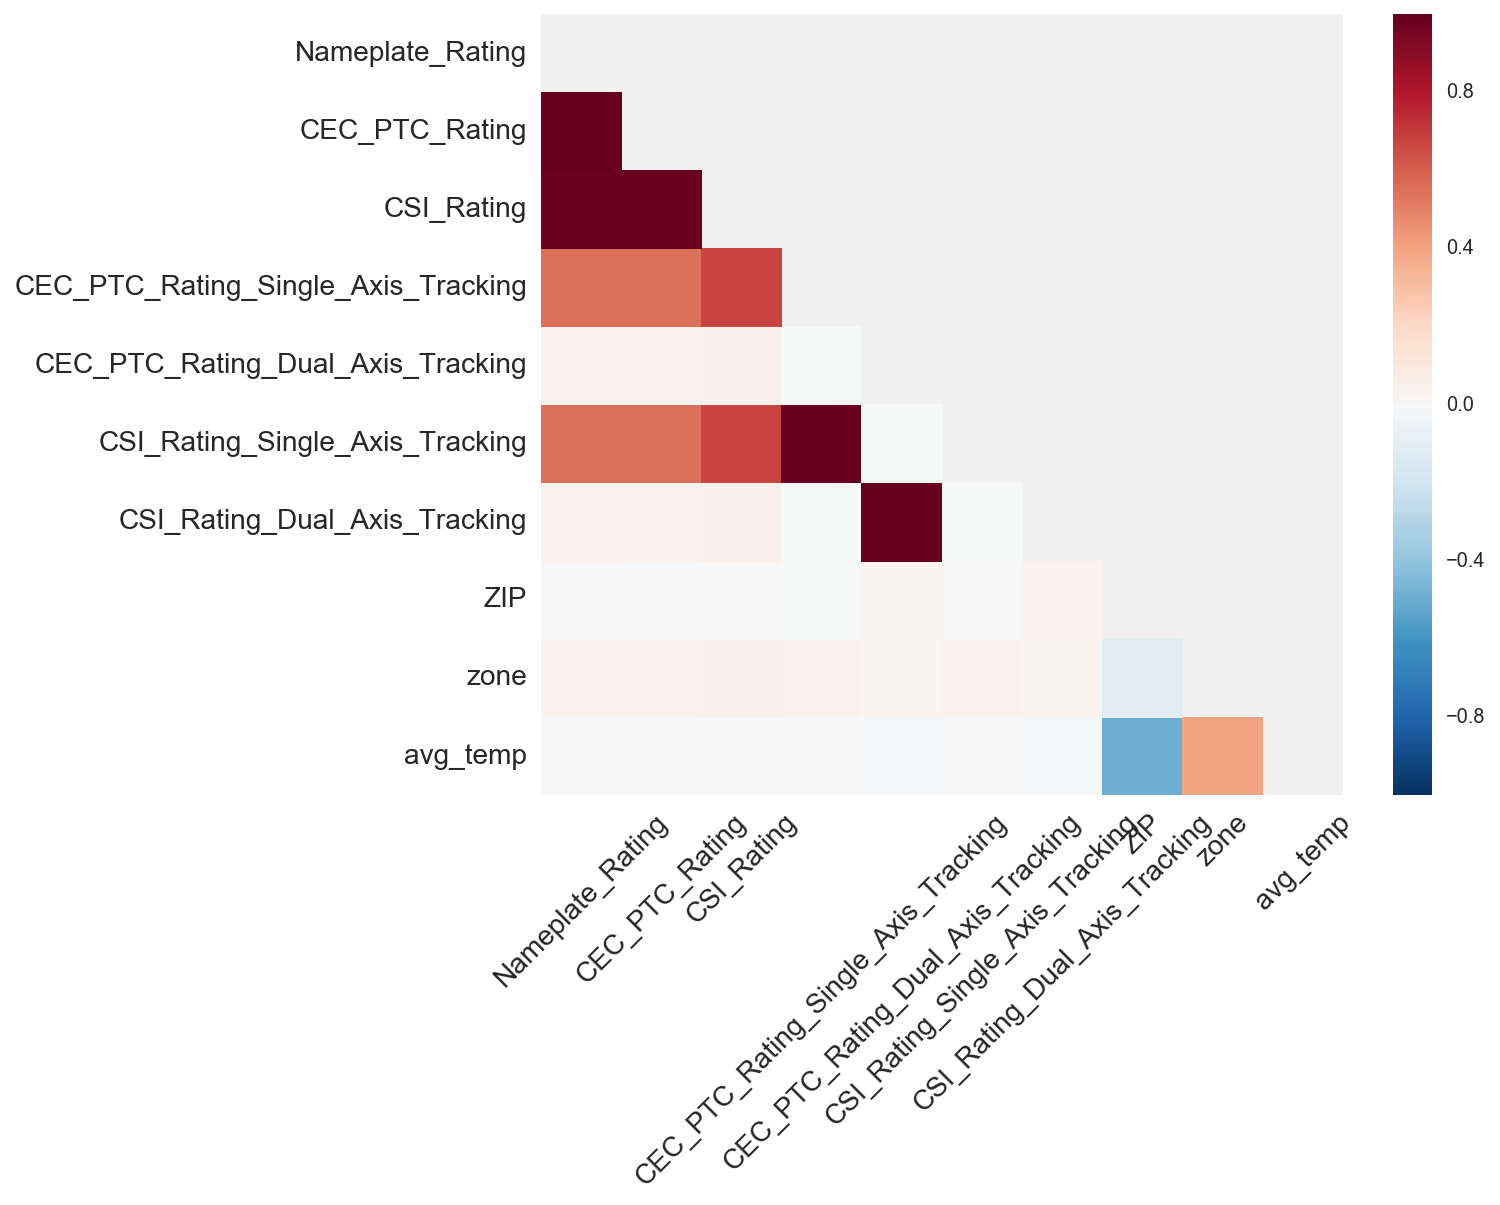

In [124]:
mask = np.zeros_like(ca_solar_df_num_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(ca_solar_df_num_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

So interesting vars are Nameplate Rating, CEC PTC Rating, CSI Rating, zone, avg_temp

Here are pair plots for solar data.

![](2.3.16.png)

<h2> 4.1 Some linear regression on CA solar data now. </h2>

In [129]:
linreg1 = LinearRegression()

linreg_scores1 = cross_val_score(linreg1, X1_n, Y1, cv=10)

print linreg_scores1
print np.mean(linreg_scores1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


As in the case for PGE data, this impossibly good score means that I need to change the analysis formula and try Ridge.

<h2> 4.2 Ridge regression with cross-validation. </h2>

<pre>
[-0.00155068 -0.00171807 -0.00167181 -0.0017627  -0.00141556 -0.00149767
 -0.00178824 -0.00182503 -0.00162957 -0.00155959]
-0.00164189170755
</pre>

Since this regression also did not work, I will do Elastic Net. 

<h2> 4.3 Try ElasticNet now. </h2>

Here's the result w sampled data.

The enet score is:  0.999764539287. A bit too good.

![](4.3.2.0.png)

And here is the result w full data  run on AWS:

![](4.3.2.1.png)

For CSI_Rating, we have correlation w Nameplate_Rating, CEC_PTC_Rating, CEC_PTC_Rating_Dual axis,, CSI Rating*, zone,
and anti-correlation w CEC_PTC rating single axis. The main difference seems to be in the greater anti-correlation between CS_Rating and CEC_PTC rating single axis.

<h2> 4.4 Let's also try time series analysis here, since the data covers 2012-2016 also. </h2>

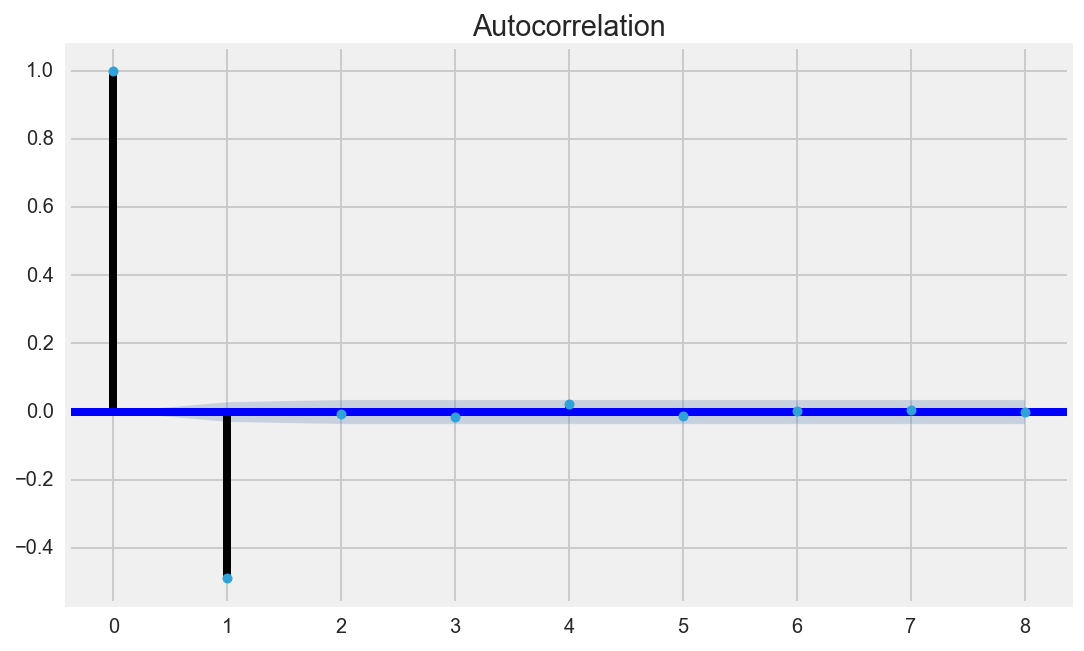

In [141]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
plot_acf(ca_nameplate_diff, lags=8, ax=ax)
plt.show()

In [142]:
ar3 = ARMA(ca_nameplate_diff.values, (1,0)).fit()
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 4519
Model:                     ARMA(1, 0)   Log Likelihood              -26500.143
Method:                       css-mle   S.D. of innovations             85.216
Date:                Thu, 06 Oct 2016   AIC                          53006.286
Time:                        11:37:01   BIC                          53025.534
Sample:                             0   HQIC                         53013.067
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0005      0.851      0.001      1.000        -1.668     1.669
ar.L1.y       -0.4894      0.013    -37.736      0.000        -0.515    -0.464
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0433           +0.0000j            2.0433            0.5000
-----------------------------------------------------------------------------
"""

In [143]:
r2_score(ca_nameplate_diff, ar3.fittedvalues)

0.23962212330877752

On AWS I get: 0.22957776323642776. Not clear why id went down a bit.

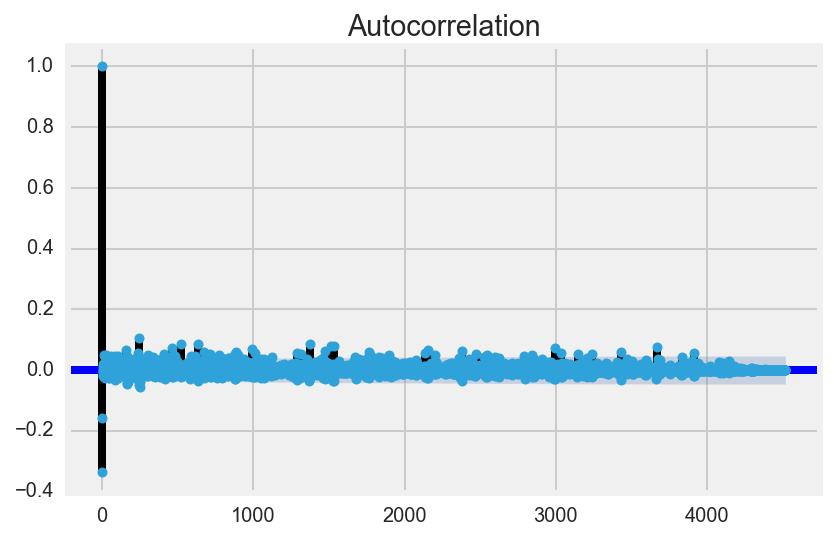

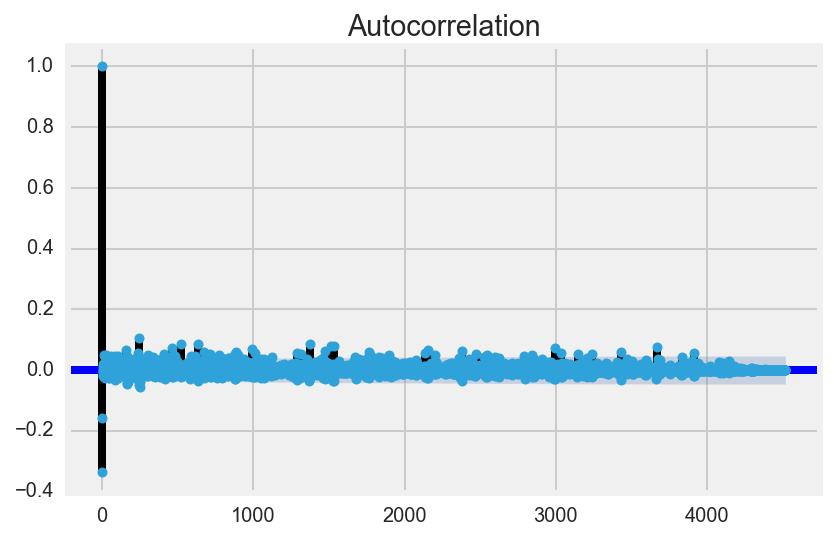

In [144]:
plot_acf(ar3.resid)

Likewise, the auto-correlation plot seems OK, so we can trust the time series analysis. 

<h2> 5. Let's merge now the PGE data w the solar data, see what we can learn from that. </h2>

In [145]:
pge_q_num.head(3)

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh,zone,avg_temp
7419,95917,3,2015,2,1,505.0,328052.0,650.0,11.0,53.500000
1393,95204,4,2012,1,1,581.0,2218140.0,3818.0,12.0,57.166667
3426,94530,2,2016,1,1,531.0,2439342.0,4594.0,3.0,55.000000


In [146]:
ca_solar_df_num.head(3)

,Nameplate_Rating,CEC_PTC_Rating,CSI_Rating,CEC_PTC_Rating_Single_Axis_Tracking,CEC_PTC_Rating_Dual_Axis_Tracking,CSI_Rating_Single_Axis_Tracking,CSI_Rating_Dual_Axis_Tracking,ZIP,zone,avg_temp
58071,3.29,2.851,2.802,0.0,0.0,0.0,0.0,95962,11.0,53.500000
15808,7.52,6.522,5.846,0.0,0.0,0.0,0.0,94509,12.0,57.166667
11308,3.90,3.344,3.343,0.0,0.0,0.0,0.0,93932,4.0,57.500000


Adding now some columns from ca_solar_df_num to pge_q_num using dictionaries on ZIP/ZipCode. 
Since solar kWh numbers are generated, while pge kWh consumed, we multiply the solar numbers by -1 to show this relationship.

In [169]:
pge_q_num.head(3)

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh,zone,avg_temp,nameplate,cec,csi,cec_1_track,cec_2_track,csi_1_track,csi_2_track
7419,95917,3,2015,2,1,505.0,328052.0,650.0,11.0,53.500000,-5.67,-4.843,-3.970,-0.0,-0.0,-0.0,-0.0
3426,94530,2,2016,1,1,531.0,2439342.0,4594.0,3.0,55.000000,-4.80,-4.155,-4.037,-0.0,-0.0,-0.0,-0.0
6309,94954,6,2014,1,1,886.0,10355003.0,11687.0,2.0,55.166667,-5.20,-4.520,-4.454,-0.0,-0.0,-0.0,-0.0


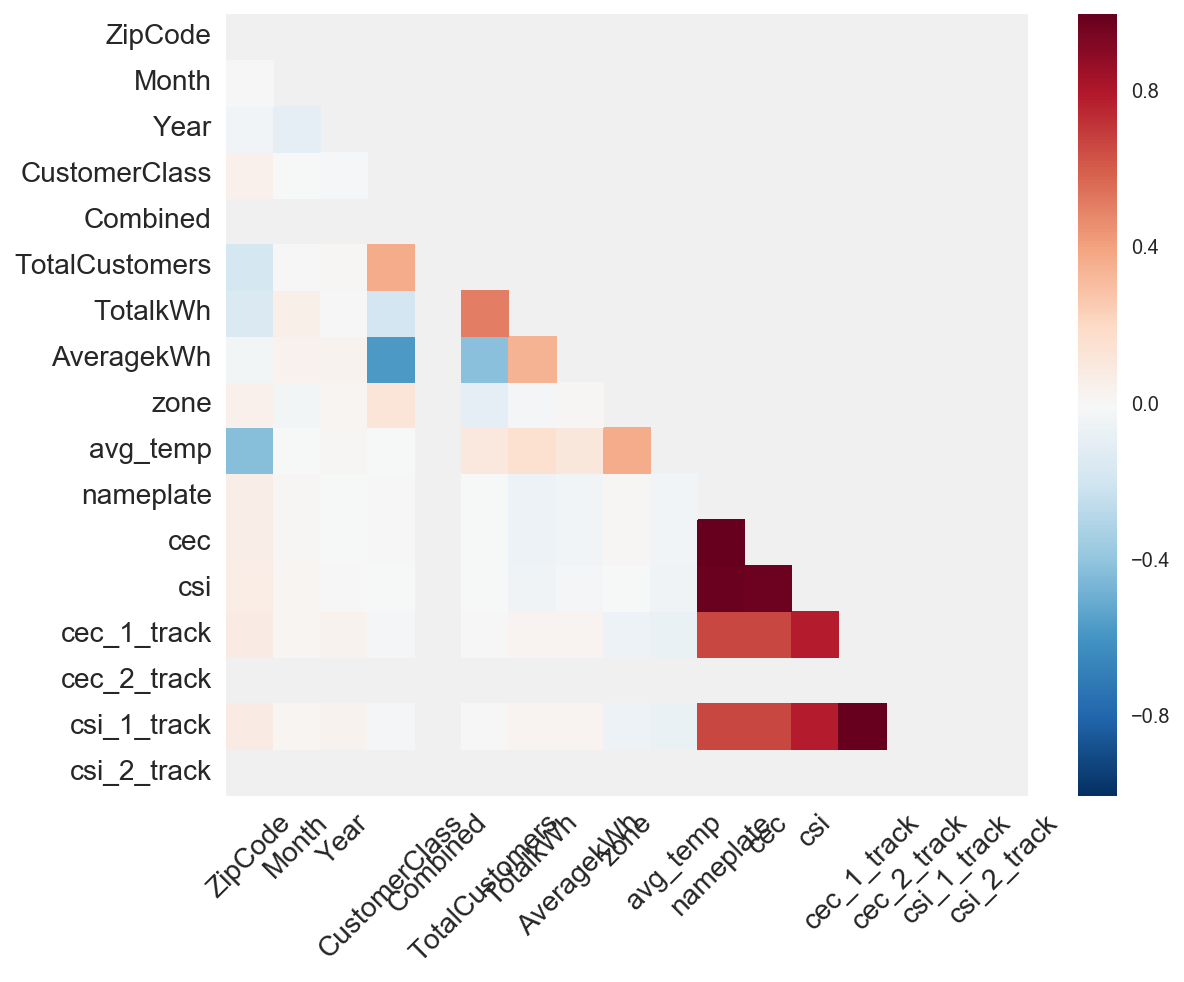

In [171]:
mask = np.zeros_like(pge_q_num_corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(pge_q_num_corr1, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

Here are pair plots for combined PG&E and solar data.

![](2.3.16.png)

<h2> 5.1  Let's see if there is any correlation between TotalkWh (a PGE datum) 
and nameplate (a solar datum) by zone. </h2>

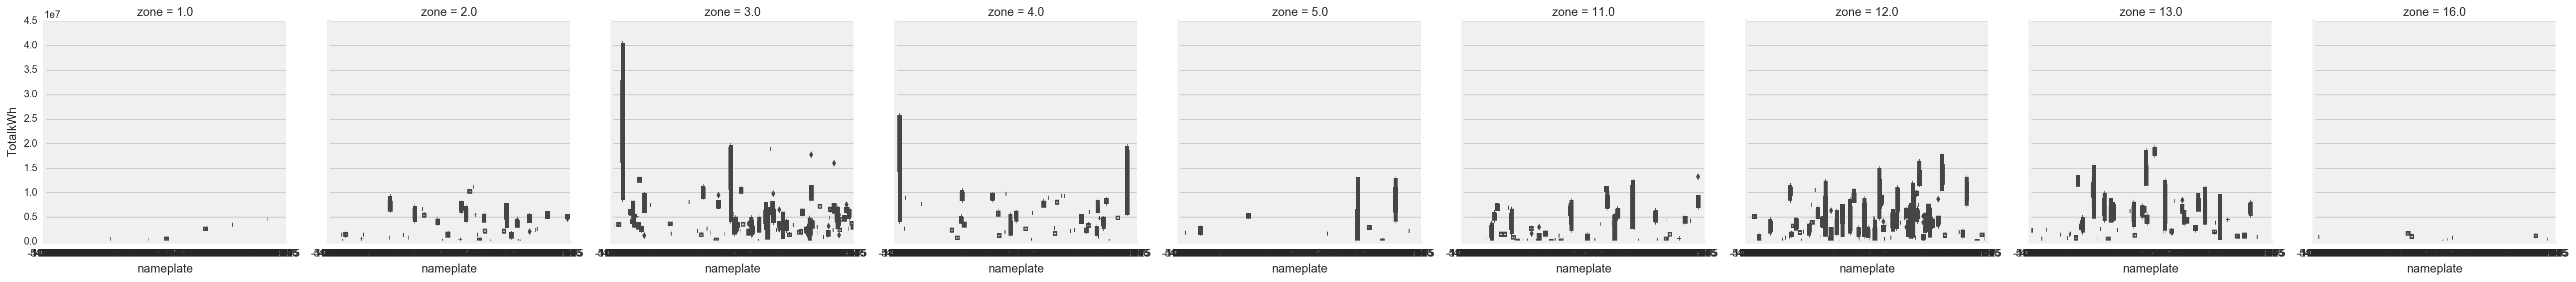

In [172]:
#sns.factorplot(x='Month', y='TotalkWh',col='Year', kind='box', data=pge_q_num)
sns.factorplot(x='nameplate', y='TotalkWh',col='zone', kind='box', data=pge_q_num)

And now the factorplot w the full data set: 

![](5.1.2.1.png)

There seems to be some correlation between nameplate and TotalkWh in certain zones: 3, 4, 11, 12, 13. The extra data just adds more detail but does not change the dependence significantly.

<h2> 5.2 Let's do now some Linear Regression. </h2>

In [177]:
linreg2 = LinearRegression()

linreg_scores2 = cross_val_score(linreg2, X2_n, Y2, cv=10)

print linreg_scores2
print np.mean(linreg_scores2)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


<h2> 5.3 Finally, ElasticNet to get the optimal value. </h2>

The enet score is:  0.573239914051. Again, not great but not that bad either. 

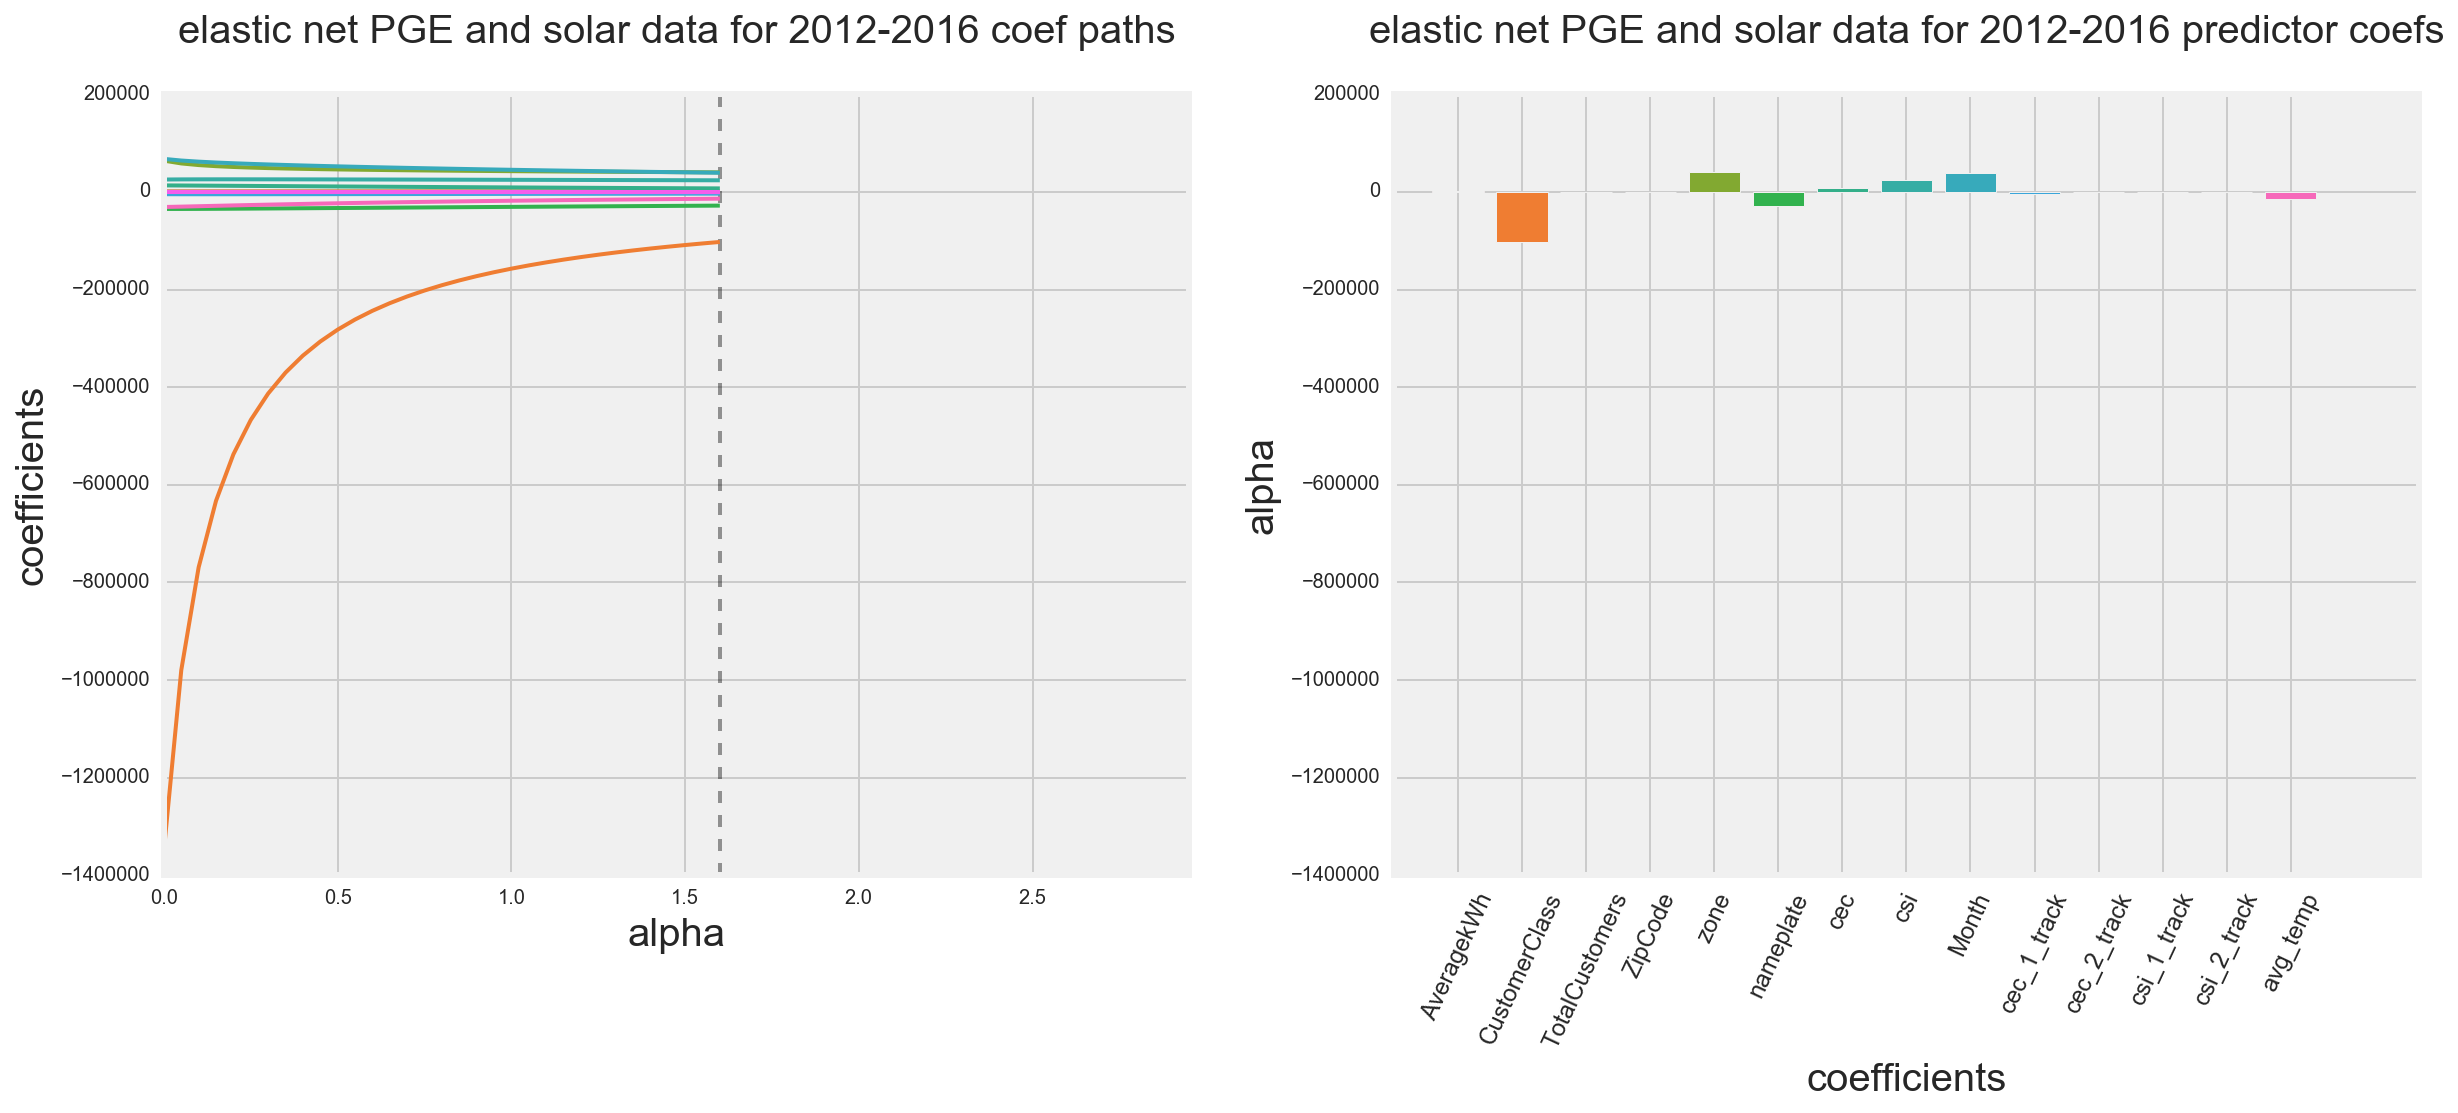

<function __main__.enet_plot_runner>

In [182]:
def enet_plot_runner(alpha=01.6):
    coef_plotter(enet_alphas2, enet_coefs2, simple_feature_names2, alpha, 
                 regtype='elastic net PGE and solar data for 2012-2016')

interact(enet_plot_runner, alpha=(0.0,3.0,0.05))

And now with the full data: 

![](5.4.1.2.png)

With the full data set, we get more detail on how different CustomerClass sub-classes correlate w TotalkWh.

In [201]:
pge_q_num.head(3)

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh,zone,avg_temp,nameplate,cec,csi,cec_1_track,cec_2_track,csi_1_track,csi_2_track
7419,95917,3,2015,2,1,505.0,328052.0,650.0,11.0,53.500000,-5.67,-4.843,-3.970,-0.0,-0.0,-0.0,-0.0
3426,94530,2,2016,1,1,531.0,2439342.0,4594.0,3.0,55.000000,-4.80,-4.155,-4.037,-0.0,-0.0,-0.0,-0.0
6309,94954,6,2014,1,1,886.0,10355003.0,11687.0,2.0,55.166667,-5.20,-4.520,-4.454,-0.0,-0.0,-0.0,-0.0


<h2> 6. Analysis. </h2>

![](BuildingClimateZones.jpg)

<h3> 6.1 PGE data analysis </h3>

Regarding the PGE data, it seems that 'TotalkWh' correlates with "zone" and "avg_temp" 
and anti-correlates with "Month", and "CustomerClass". The correlation seems surprising as average temperature 
is concerned, somewhat surprising regarding zones. I would not expect consumption to go up with temperature.
Maybe some of the electricity is used for cooling in hotter zones. Zones 10-16 are more in the desert region of CA. 


Regarding the anti-correlation between TotalkWh and Months, that seems reasonable: as decrease (go from Jun=6 to Jan=1) comsumption increases. There is more consumption in the winter, when is colder. 

There also seems to be some anti-correlation between different CustomerClasses and TotalkWh. The categories are:
Electric-Commercial'=1; 'Electric-Residential'=2; 'Electric-Agricultural'=3;'Electric-Industrial'=4.
Anti-correlation betweek TotalkWh and CustomerClass means that TotalkWh increases as CustomerClass is decreases, so
it is more for Electric-Commercial and Electric-Residential. So it seems these 2 Customer classes consume more electricity. 

On AWS, w the full data set,  TotalkWh correlates w CustomerClass[1], avg_temp, zone, and anti-correlates w CustomerClass[2] and CustomerClass[3].

<h3> 6.2 Solar data analysis </h3>

Regarding solar data, I need more detail data, by month for instance. For CSI_Rating, we have correlation w Nameplate_Rating, CEC_PTC_Rating* , CSI Rating*, zone, and anti-correlation w CEC_PTC rating single axis.
The correlation between Nameplate numbers and CEC* , CSI* numbers make sense, they are kWhs from different types
of panels in similar area. The interesting correlation is between Nameplate Rating and zones. The higher number zones,
like 10-16 are more in the desert part of CA. There, we would expect more sun, hence more electricity from solar panels. 

It is not clear why there is the anti-correlation w CEC_PTC_rating single axis. 

<h3> 6.3 Join PG&E and solar data analysis. </h3>

When our target is 'AveragekWh, and it correlates w 'CustomerClass, and correlates w 'zone', 'nameplate',
and 'avg_temp'. The correlation between AveragekWh and Nameplate, avg_temp(average temperature) makes sense: 
as Nameplate numbers, avg_temp increase, so do AveragekWh. 

The correlation beween AveragekWh and zones is interesting: as zones increase, the location is desert-like. There we expect more sunshine, hence more kWh used (perhaps cooling?!) 

The correlation between AveragekWh and CustomerClass is also interesting: as  in the PG&E data analysis, the higher CustomerClass numbers correspond to Electric-Agricultural and Electric-Industrial. These seem the bigger consumers of
electricity. These consumers would be good candidates to increase their solar power generation.

If we switch to 'TotalkWh', we get correlation w 'CustomerClass[3]',  'csi', 'avg_temp', 
'zone' and 'cec'. 

On AWS, w the full data set,  TotalkWh correlates w CustomerClass[1], csi, avg_temp, zone, and anti-correlates w CustomerClass[2] and CustomerClass[3]. 

The correlation between TotalkWh and CSI*, avg_temp and CEC* is interesting: the more TotalkWh used, more solar power is generated by solar panels. So maybe people we switching to more solar power generation. 

The correlation between TotalkWh and avg_temp and zone is reasonable: higher temperature, higher use of electricity (maybe cooling, as above); and higher zones are in the desert, correlating with higher temperature. 

The last correlation, between TotalkWh and CustomerClass[3], Electric-Agricultural is interesting. Perhaps agricultural users need more electricity than other customers. 

I also looked at plot data for nameplate and TotalkWh by zones.

There seems to be some correlation between nameplate and TotalkWh in certain zones: 3, 4, 11, 12, 13. The extra data just adds more detail but does not change the dependence significantly. Zones 3, 4 are costal zones, while 11-13
are more desert-like. It seems people are accumulating solar power both on the coast and in  the desert. 

<h2> Conclusion. </h2>

A data science project is a bit like making a documentary: we gather data, explore it, analyse it. At the end, 
we hope to find an interesting story to tell. Hopefully this was an interesting story. 